In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import stats_can 
import scipy.stats as st

# Initial Data Cleaning/Setup

In [2]:
# Create a data frame using the raw data
main_df = pd.read_csv("raw\\application_data_cleaned_v1.csv")

In [3]:
# Check for null values
main_df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        8
AMT_GOODS_PRICE                  163
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                62316
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
ORGANIZATION_TYPE                  0
d

In [4]:
# Drop null values
main_df.dropna(axis=0,inplace=True)
#main_df["AMT_GOODS_PRICE"].dropna(axis=0,inplace=True)

In [5]:
# Display count of null values - should now be 0
main_df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
dtype: int64

In [6]:
# Split data into defaulters and non-defaulters
df_defaulters = main_df[main_df['TARGET']==1]
df_normal = main_df[main_df['TARGET']==0]

In [7]:
df_defaulters.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,...,1,1,0,1,1,0,Laborers,2,2,Business Entity Type 3
1,100031,1,Cash loans,F,N,Y,112500.0,979992.0,27076.5,702000.0,...,1,1,0,1,0,0,Cooking staff,3,2,Business Entity Type 3
2,100047,1,Cash loans,M,N,Y,202500.0,1193580.0,35028.0,855000.0,...,1,1,0,1,0,0,Laborers,2,2,Business Entity Type 3
3,100049,1,Cash loans,F,N,N,135000.0,288873.0,16258.5,238500.0,...,1,1,1,1,1,0,Sales staff,3,3,Self-employed
6,100130,1,Cash loans,F,N,Y,157500.0,723996.0,30802.5,585000.0,...,1,1,0,1,1,0,Sales staff,2,2,Trade: type 2


In [8]:
df_normal.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE
24825,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,...,1,1,0,1,1,0,Core staff,1,1,School
24826,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,...,1,1,1,1,1,0,Laborers,2,2,Government
24827,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,...,1,1,0,1,0,0,Laborers,2,2,Business Entity Type 3
24828,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,...,1,1,0,1,0,0,Core staff,2,2,Religion
24829,100008,0,Cash loans,M,N,Y,99000.0,490495.5,27517.5,454500.0,...,1,1,1,1,1,0,Laborers,2,2,Other


# Statistical Summary

In [9]:
#Statistical summary
stat_normal = df_normal.agg({
    "AMT_INCOME_TOTAL":["min", "max", 'mean',"median","std"],
    "AMT_CREDIT":["min", "max", 'mean',"median","std"],
    "AMT_ANNUITY":["min", "max", 'mean',"median","std"],
    "AMT_GOODS_PRICE":["min", "max", 'mean',"median","std"],
    "REGION_RATING_CLIENT":["min", "max", 'mean',"median","std"],
    "REGION_RATING_CLIENT_W_CITY":["min", "max", 'mean',"median","std"]
    })
stat_defaulters = df_defaulters.agg({
    "AMT_INCOME_TOTAL":["min", "max", 'mean',"median","std"],
    "AMT_CREDIT":["min", "max", 'mean',"median","std"],
    "AMT_ANNUITY":["min", "max", 'mean',"median","std"],
    "AMT_GOODS_PRICE":["min", "max", 'mean',"median","std"],
    "REGION_RATING_CLIENT":["min", "max", 'mean',"median","std"],
    "REGION_RATING_CLIENT_W_CITY":["min", "max", 'mean',"median","std"]
    })

print(stat_normal)
print(stat_defaulters)

        AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
min         2.565000e+04  4.500000e+04    1980.000000     4.500000e+04   
max         9.000000e+06  4.050000e+06  258025.500000     4.050000e+06   
mean        1.763155e+05  6.165580e+05   27938.316454     5.546664e+05   
median      1.575000e+05  5.212800e+05   25933.500000     4.500000e+05   
std         1.085158e+05  4.112805e+05   14899.864509     3.779636e+05   

        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  
min                 1.000000                     1.000000  
max                 3.000000                     3.000000  
mean                2.038820                     2.017419  
median              2.000000                     2.000000  
std                 0.509061                     0.503236  
        AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
min         2.700000e+04  4.500000e+04    3172.500000     4.500000e+04   
max         1.170000e+08  3.020760e+06  127507.

# Income

In [10]:
main_df['AMT_INCOME_TOTAL'].min()
main_df_NO_outlier = main_df[(np.abs(st.zscore(main_df["AMT_INCOME_TOTAL"])) < 3)]
print(main_df_NO_outlier["AMT_INCOME_TOTAL"].max())
print(main_df_NO_outlier["AMT_INCOME_TOTAL"].min())
# max income is 117000000.0, min 25650.0
bins_income = [0,50000,100000,150000,200000,400000,800000,1600000,3200000]
main_df_NO_outlier['AMT_INCOME_TOTAL_bin'] = pd.cut(main_df_NO_outlier['AMT_INCOME_TOTAL'], bins_income)
df_defaulters_NO_outliers = main_df_NO_outlier[main_df_NO_outlier['TARGET']==1]
df_normal_NO_outliers = main_df_NO_outlier[main_df_NO_outlier['TARGET']==0]

1170000.0
25650.0


C:\Users\zw\AppData\Local\Temp\ipykernel_25904\1304841482.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df_NO_outlier['AMT_INCOME_TOTAL_bin'] = pd.cut(main_df_NO_outlier['AMT_INCOME_TOTAL'], bins_income)


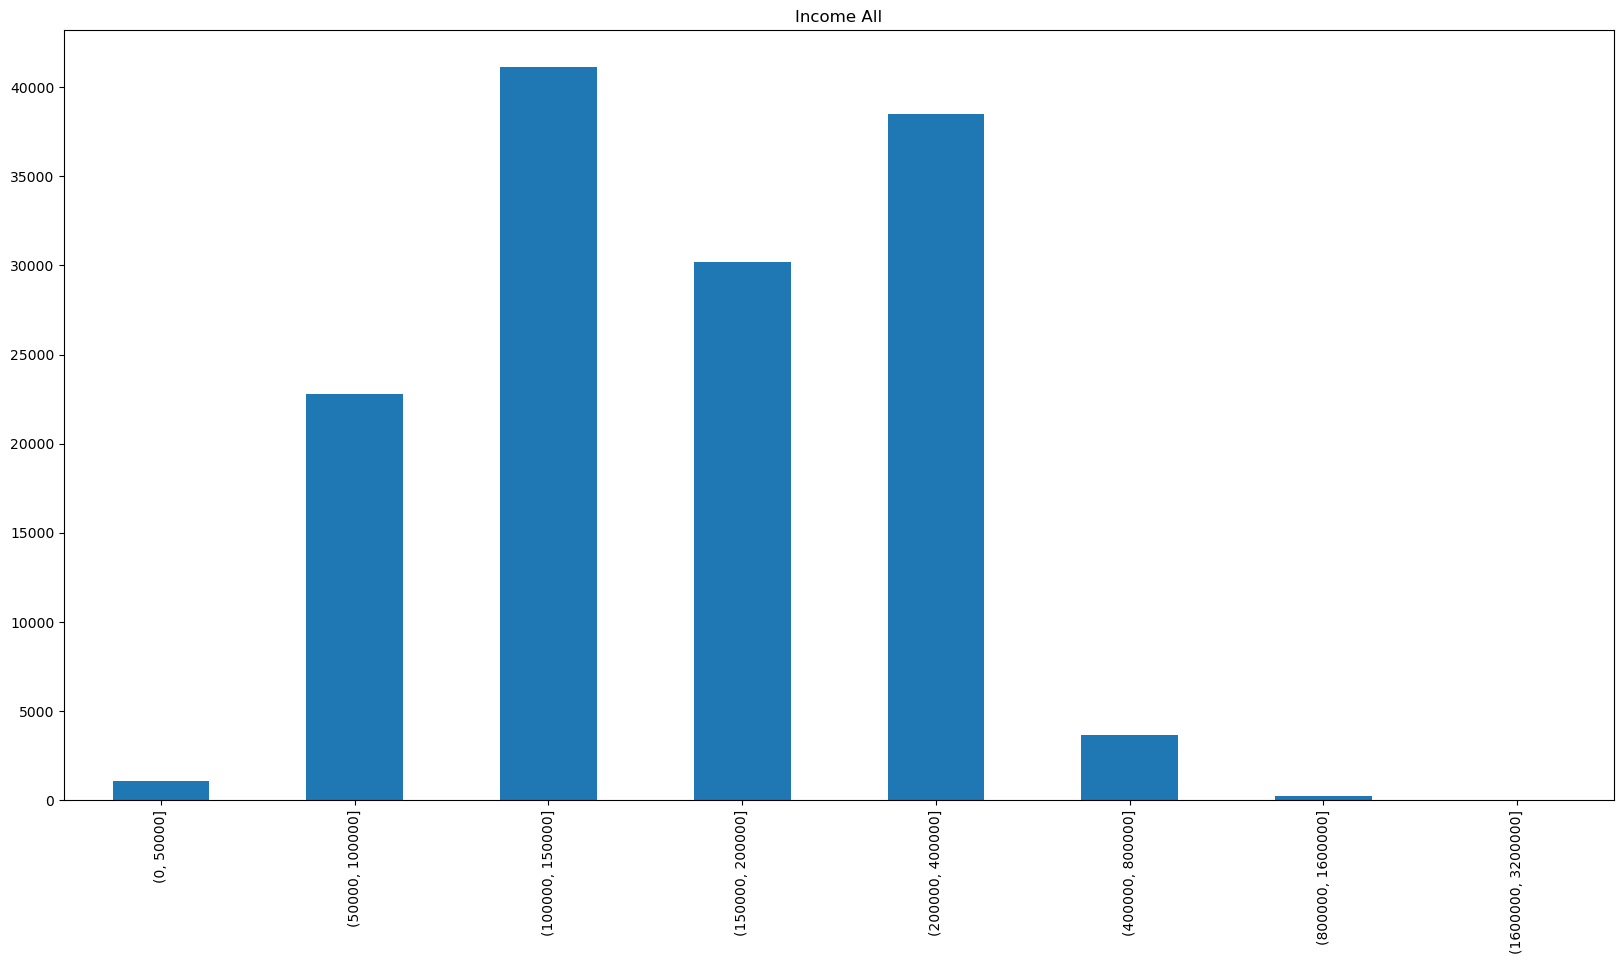

In [51]:
fig_income_all = main_df_NO_outlier['AMT_INCOME_TOTAL_bin'].value_counts().sort_index().plot.bar(figsize = (20,10))
plt.title("Income All")
plt.savefig('figures\\fig_income_all.png')

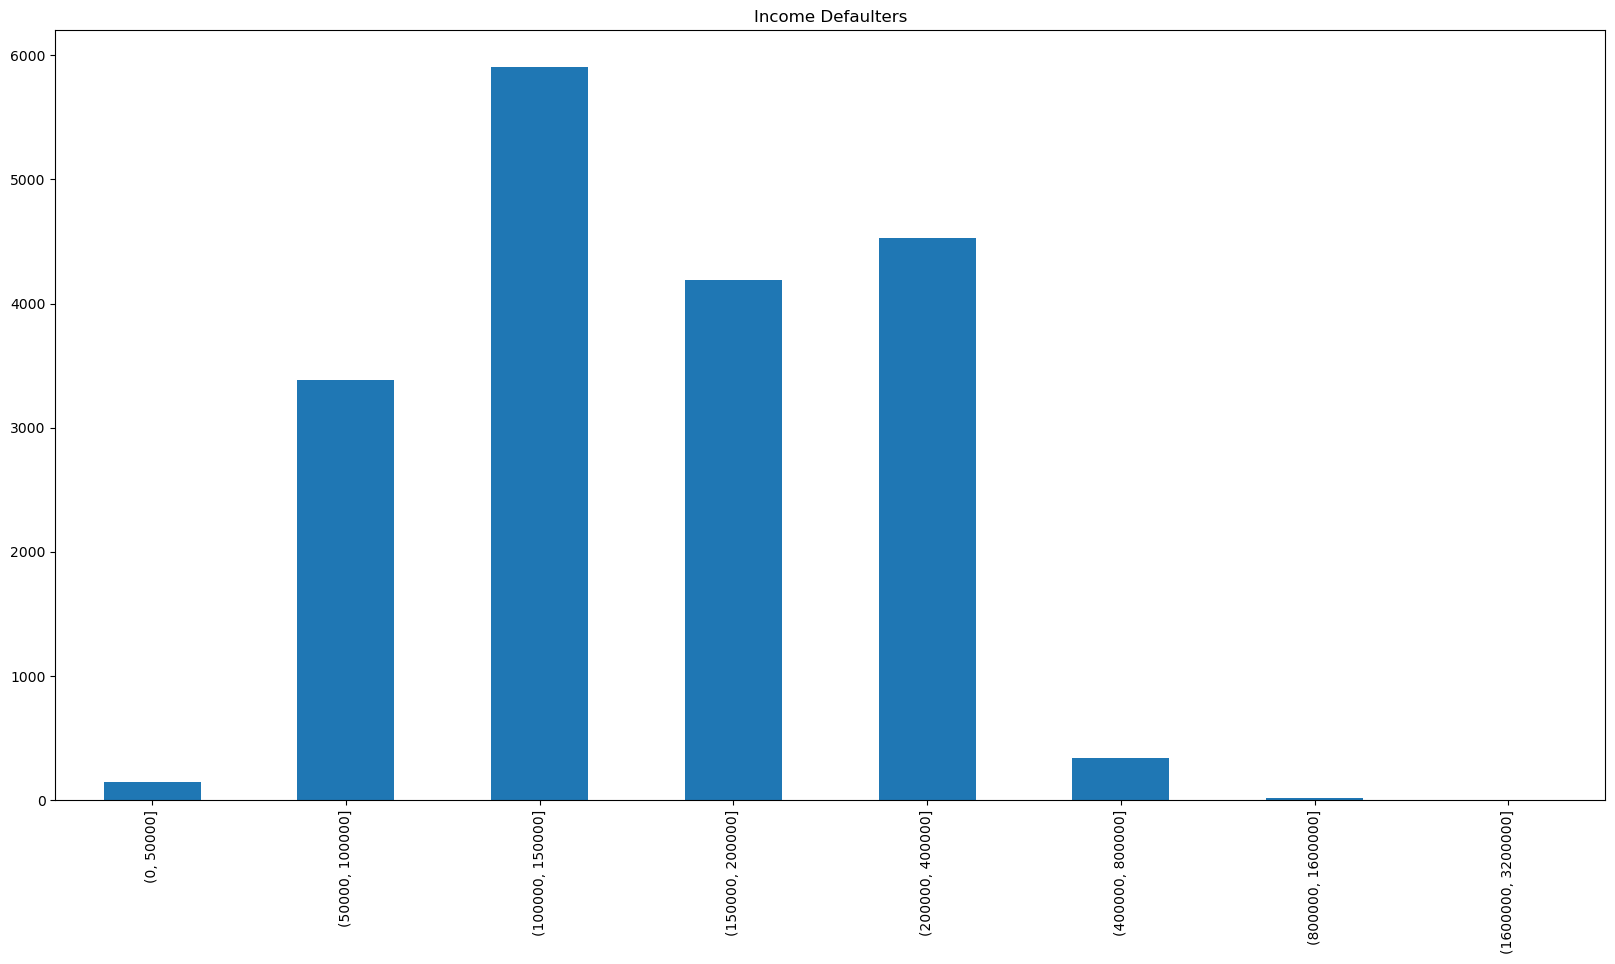

In [52]:
fig_income_defaulters = df_defaulters_NO_outliers['AMT_INCOME_TOTAL_bin'].value_counts().sort_index().plot.bar(figsize = (20,10))
plt.title("Income Defaulters")
plt.savefig('figures\\fig_income_def.png')

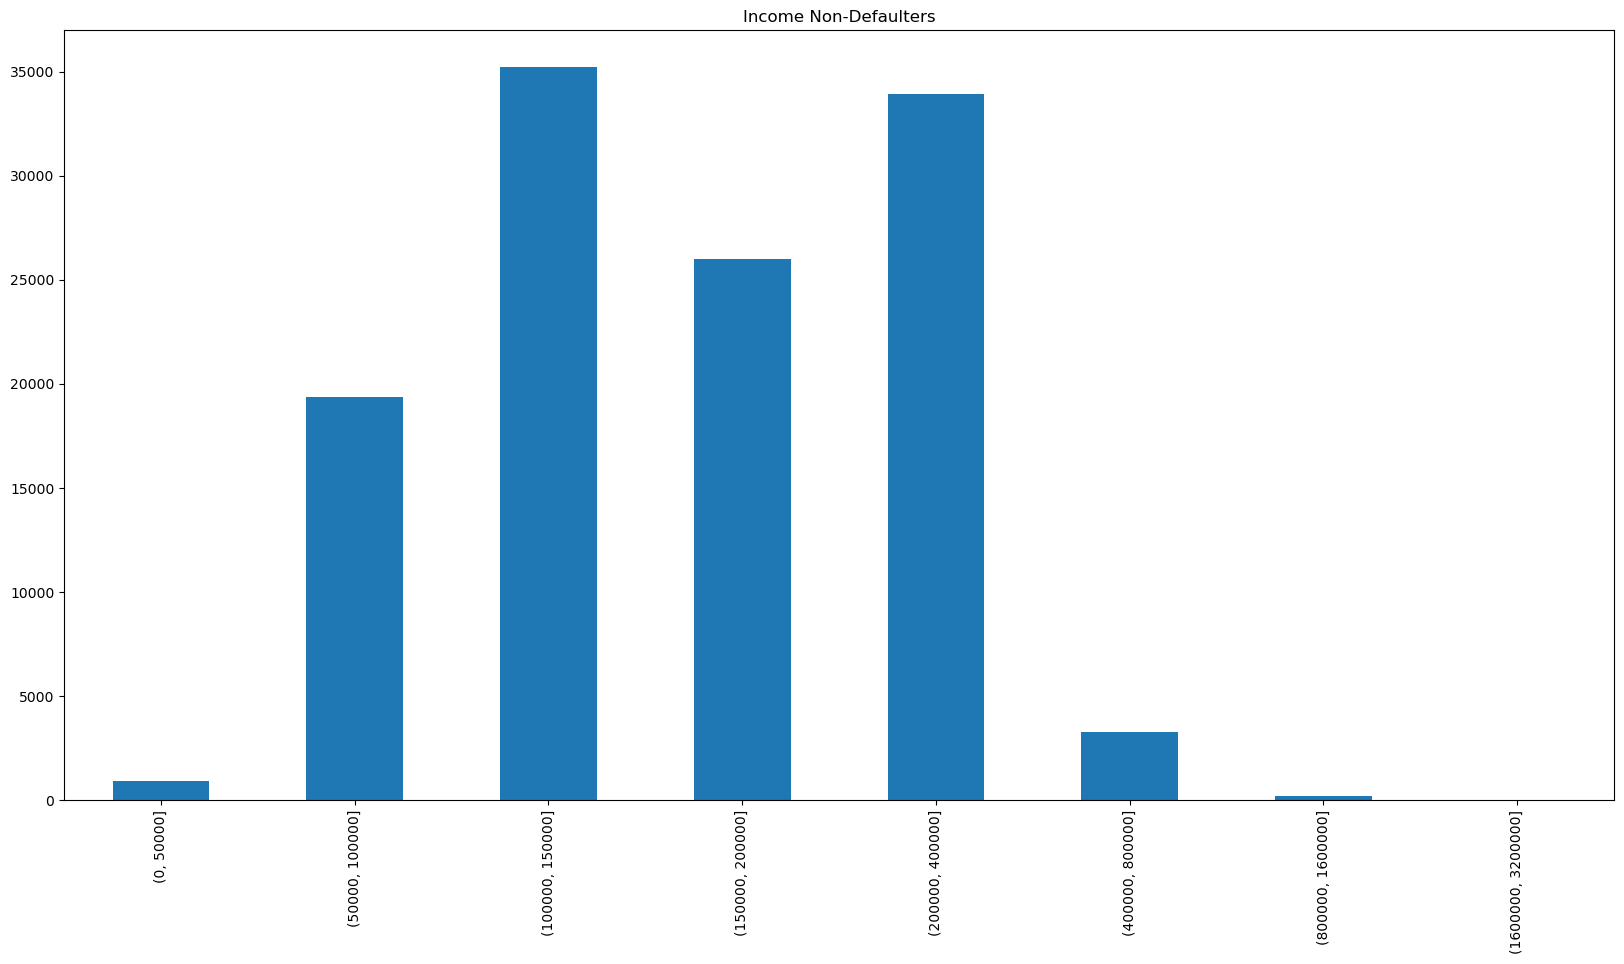

In [53]:
fig_income_normal = df_normal_NO_outliers['AMT_INCOME_TOTAL_bin'].value_counts().sort_index().plot.bar(figsize = (20,10))
plt.title("Income Non-Defaulters")
plt.savefig('figures\\fig_income_nor.png')

There is slightly more defaulters in lower income brackets.

0.3837679708648895


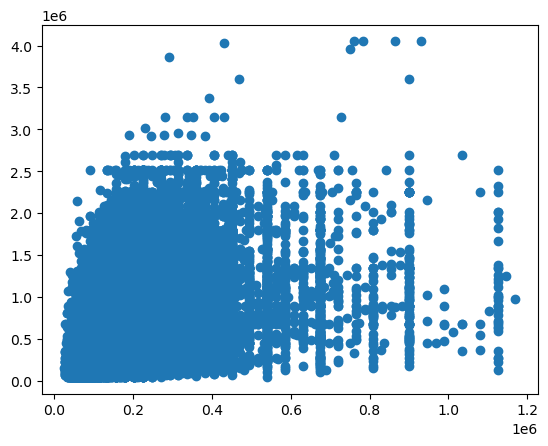

In [14]:
#income_df = main_df[['AMT_CREDIT',"AMT_INCOME_TOTAL"]]
#income_df = income_df[(np.abs(stats.zscore(income_df["AMT_INCOME_TOTAL"])) < 3)]
#fig_icvomeVScredit = plt.scatter(income_df["AMT_INCOME_TOTAL"],income_df["AMT_CREDIT"])
fig_incomeVScredit = plt.scatter(main_df_NO_outlier["AMT_INCOME_TOTAL"],main_df_NO_outlier["AMT_CREDIT"])
slope, intercept, r, p, std_err = st.linregress(main_df_NO_outlier["AMT_INCOME_TOTAL"], main_df_NO_outlier["AMT_CREDIT"])
print(r)
fig_incomeVScredit

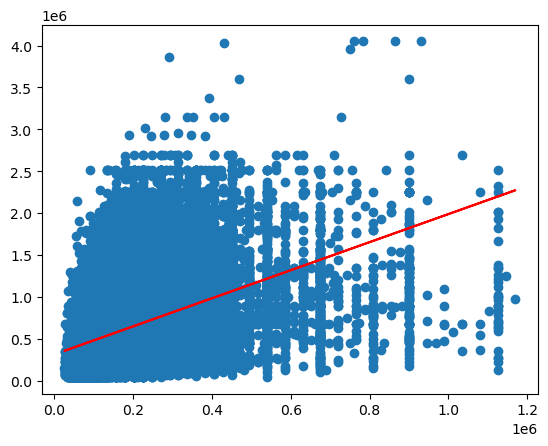

In [54]:
regress_values = main_df_NO_outlier["AMT_INCOME_TOTAL"] * slope + intercept
plt.scatter(main_df_NO_outlier["AMT_INCOME_TOTAL"],main_df_NO_outlier["AMT_CREDIT"])
plt.plot(main_df_NO_outlier["AMT_INCOME_TOTAL"], regress_values, color="red")

plt.savefig("figures\IncomeVSCreditWithRegression")

Positive coorelation between income and credit.

# Occupation

In [16]:
jobs = main_df.groupby(['OCCUPATION_TYPE'], as_index=False)['SK_ID_CURR'].count()
jobs

,OCCUPATION_TYPE,SK_ID_CURR
0,Accountants,6301
1,Cleaning staff,3009
2,Cooking staff,3928
3,Core staff,17727
4,Drivers,12358
5,HR staff,364
6,High skill tech staff,7250
7,IT staff,332
8,Laborers,36355
9,Low-skill Laborers,1429


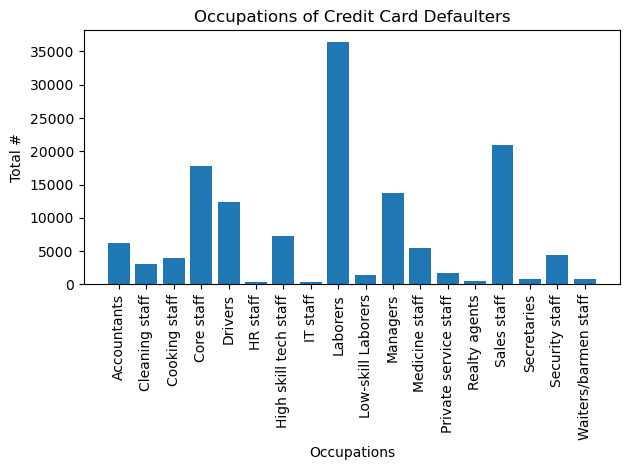

In [17]:
plt.bar(jobs['OCCUPATION_TYPE'], jobs['SK_ID_CURR'])
plt.xticks(rotation="vertical")
plt.xlabel("Occupations")
plt.ylabel("Total #")
plt.title("Occupations of Credit Card Defaulters")
plt.tight_layout()
plt.savefig("figures\Occupations-Dist-Overall")
plt.show()



In [18]:
main_df.groupby(['TARGET'], as_index=False)['OCCUPATION_TYPE'].count()

,TARGET,OCCUPATION_TYPE
0,0,119011
1,1,18530


In [19]:
default_jobs = df_defaulters.groupby(['OCCUPATION_TYPE'], as_index=False)['SK_ID_CURR'].count()

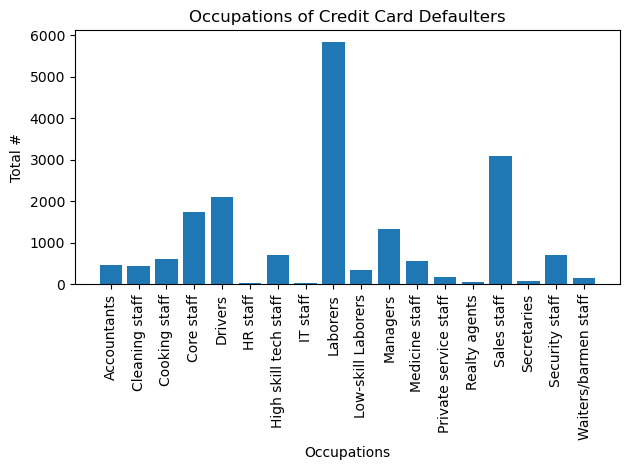

In [20]:
plt.bar(default_jobs['OCCUPATION_TYPE'], default_jobs['SK_ID_CURR'])
plt.xticks(rotation="vertical")
plt.xlabel("Occupations")
plt.ylabel("Total #")
plt.title("Occupations of Credit Card Defaulters")
plt.tight_layout()
plt.savefig("figures\OccupationsDist-Defaulters")
plt.show()

In [21]:
non_default_jobs = df_normal.groupby(['OCCUPATION_TYPE'], as_index=False)['SK_ID_CURR'].count()

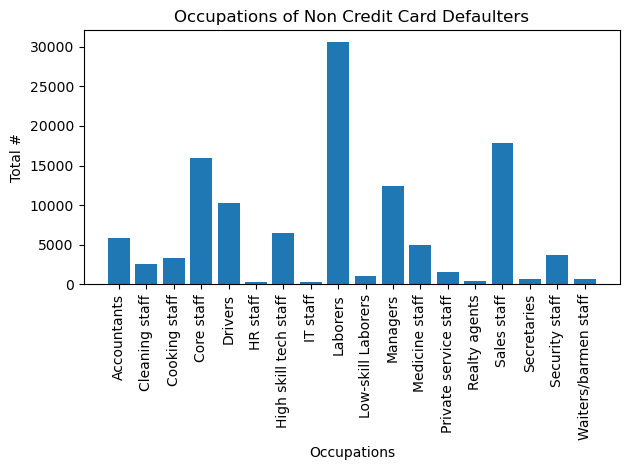

In [22]:
plt.bar(non_default_jobs['OCCUPATION_TYPE'], non_default_jobs['SK_ID_CURR'])
plt.xticks(rotation="vertical")
plt.xlabel("Occupations")
plt.ylabel("Total #")
plt.title("Occupations of Non Credit Card Defaulters")
plt.tight_layout()
plt.savefig("figures\OccupationsDist-NonDefaulters")
plt.show()

In [23]:
loans = df_defaulters.groupby(['NAME_CONTRACT_TYPE'], as_index = False)['OCCUPATION_TYPE'].count()

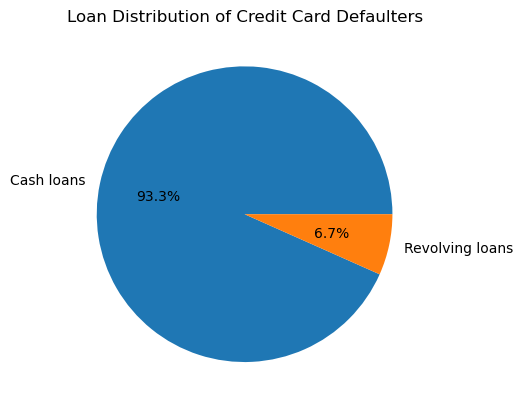

In [24]:
plt.pie(loans['OCCUPATION_TYPE'],  autopct="%1.1f%%", labels=(loans['NAME_CONTRACT_TYPE']))
plt.title("Loan Distribution of Credit Card Defaulters")
plt.savefig("figures\Loans-Defaulters")

In [25]:
loans1 = df_normal.groupby(['NAME_CONTRACT_TYPE'], as_index = False)['OCCUPATION_TYPE'].count()

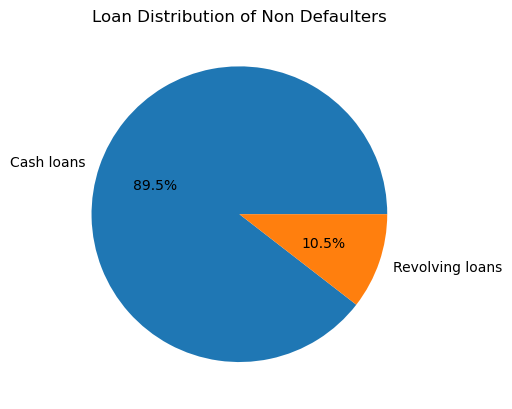

In [26]:
plt.pie(loans1['OCCUPATION_TYPE'],  autopct="%1.1f%%", labels=(loans1['NAME_CONTRACT_TYPE']))
plt.title("Loan Distribution of Non Defaulters")
plt.savefig("figures\Loans-NonDefaulters")

# Age

In [27]:
#get years birth 
main_df['years_birth'] = -(main_df['DAYS_BIRTH']//365)
df_defaulters['years_birth'] = -(df_defaulters['DAYS_BIRTH']//365)
df_normal['years_birth'] = -(df_normal['DAYS_BIRTH']//365)

C:\Users\zw\AppData\Local\Temp\ipykernel_25904\220140833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defaulters['years_birth'] = -(df_defaulters['DAYS_BIRTH']//365)
C:\Users\zw\AppData\Local\Temp\ipykernel_25904\220140833.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal['years_birth'] = -(df_normal['DAYS_BIRTH']//365)


In [28]:
#get narmalized data
years_df = pd.DataFrame(main_df['years_birth'].value_counts(normalize=True).sort_index())
years_df.columns = (["years_birth_all"])
years_df_normal = pd.DataFrame(df_normal['years_birth'].value_counts(normalize=True).sort_index())
years_df_normal.columns = (["years_birth_normal"])
years_df_defaulters = pd.DataFrame(df_defaulters['years_birth'].value_counts(normalize=True).sort_index())
years_df_defaulters.columns = (["years_birth_defaulters"])
years_df = years_df.join(years_df_normal)
years_df = years_df.join(years_df_defaulters)

count    18530.000000
mean        38.822882
std          9.671028
min         22.000000
25%         31.000000
50%         38.000000
75%         46.000000
max         69.000000
Name: years_birth, dtype: float64
count    119011.000000
mean         41.151994
std           9.995940
min          22.000000
25%          33.000000
50%          41.000000
75%          49.000000
max          70.000000
Name: years_birth, dtype: float64


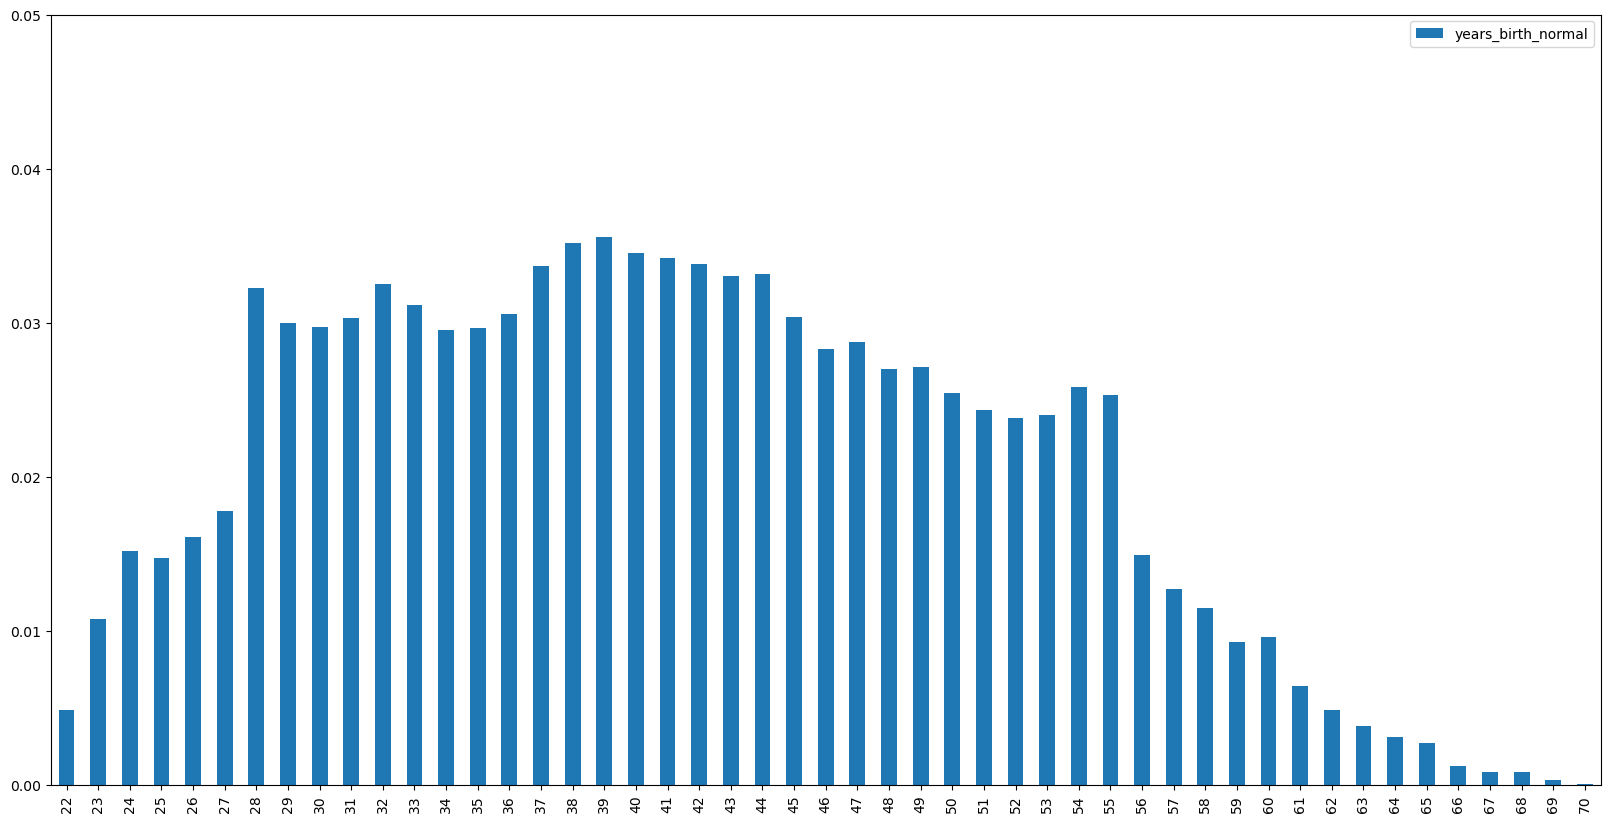

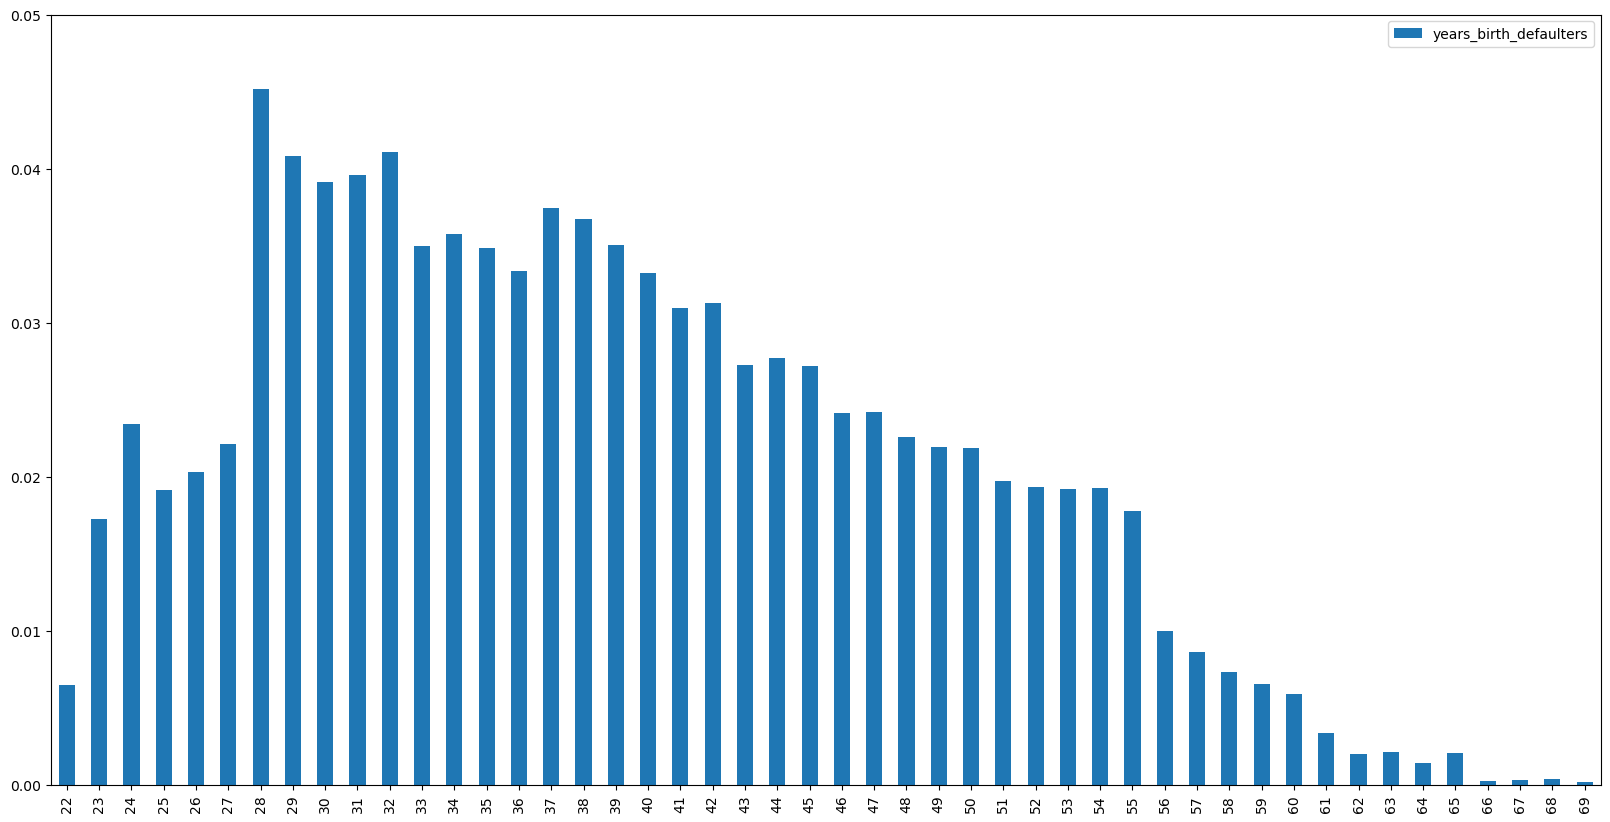

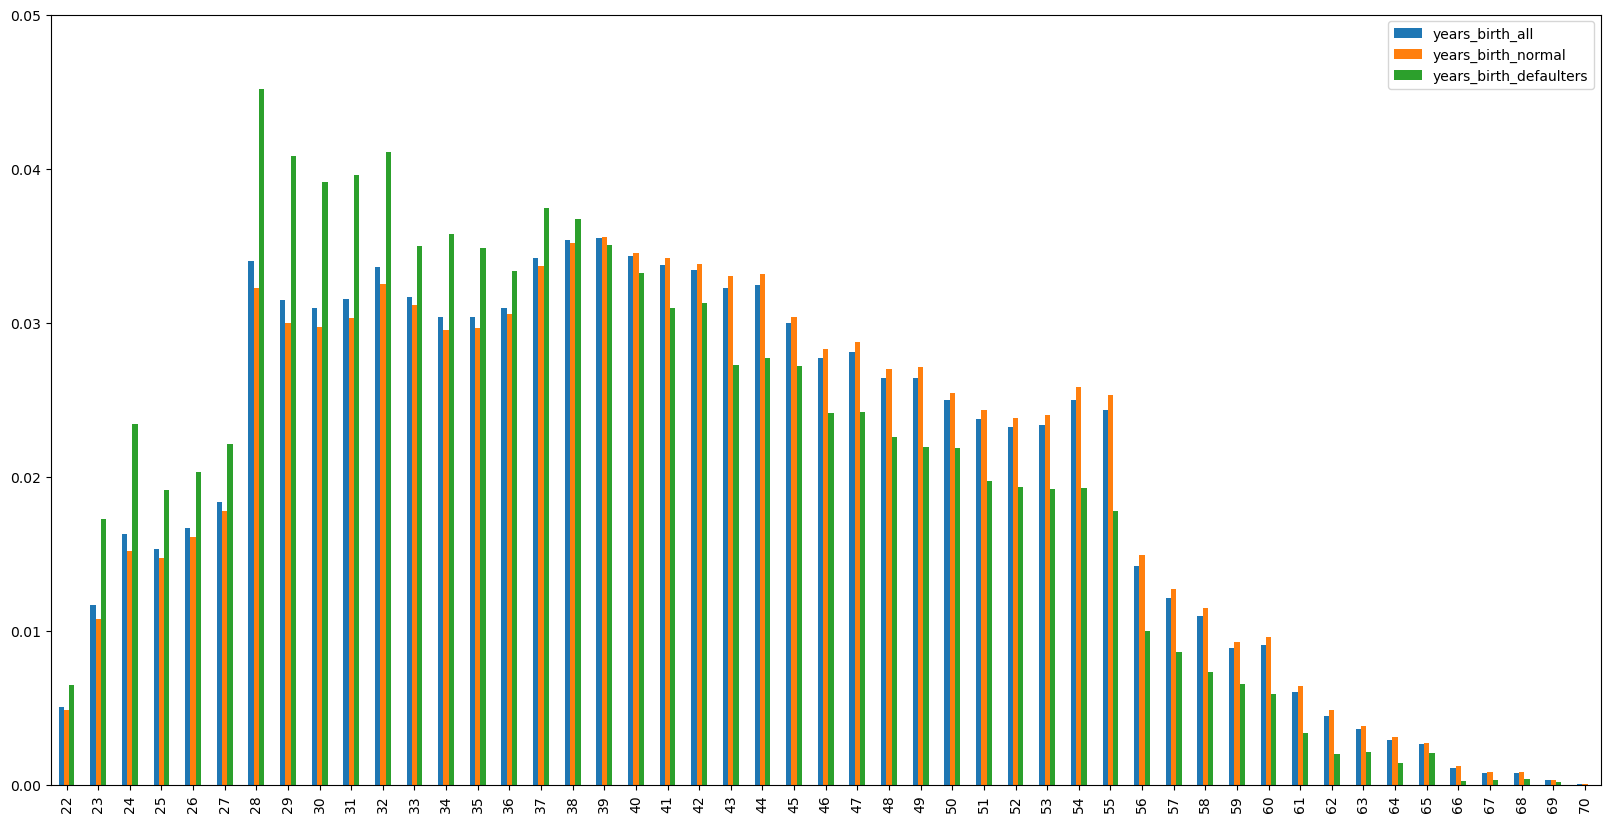

In [29]:
# figures
fig1 = years_df_normal.plot.bar(figsize = (20,10),ylim=(0.0,0.05))
plt.savefig('figures\\fig1.png')
fig2 = years_df_defaulters.plot.bar(figsize = (20,10),ylim=(0.0,0.05))
plt.savefig('figures\\fig2.png')
fig3 = years_df.plot.bar(figsize = (20,10),ylim=(0.0,0.05))
plt.savefig('figures\\fig3.png')
print(df_defaulters['years_birth'].describe())
print(df_normal['years_birth'].describe())

# Location

   REGION_RATING_CLIENT
1              0.062601
2              0.720399
3              0.216999
   REGION_RATING_CLIENT
1              0.110914
2              0.739352
3              0.149734
count    18530.000000
mean         2.154398
std          0.505743
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: REGION_RATING_CLIENT, dtype: float64
count    119011.000000
mean          2.038820
std           0.509061
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


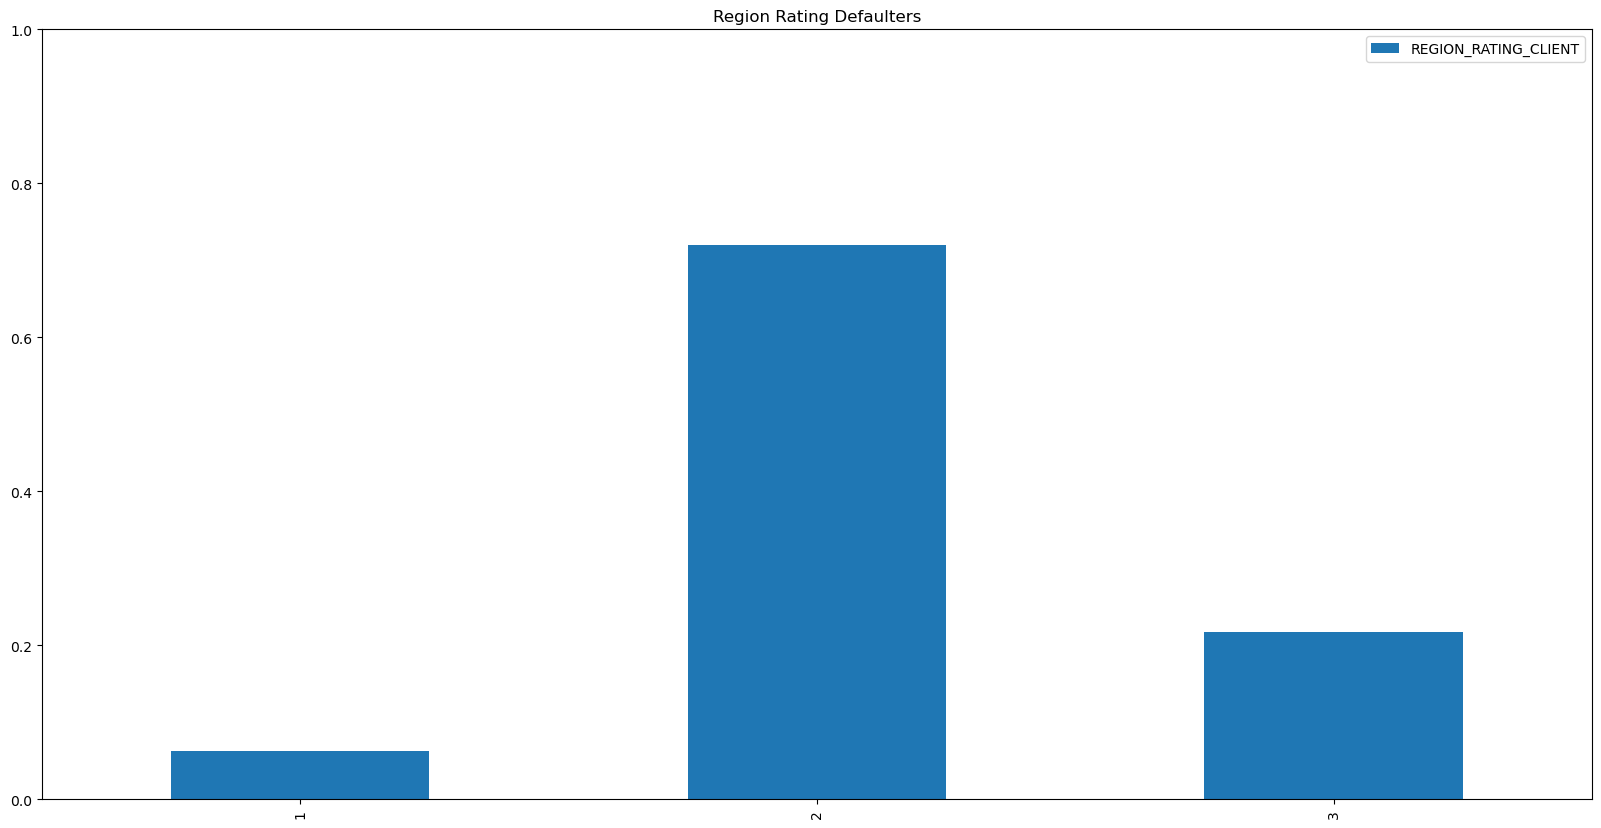

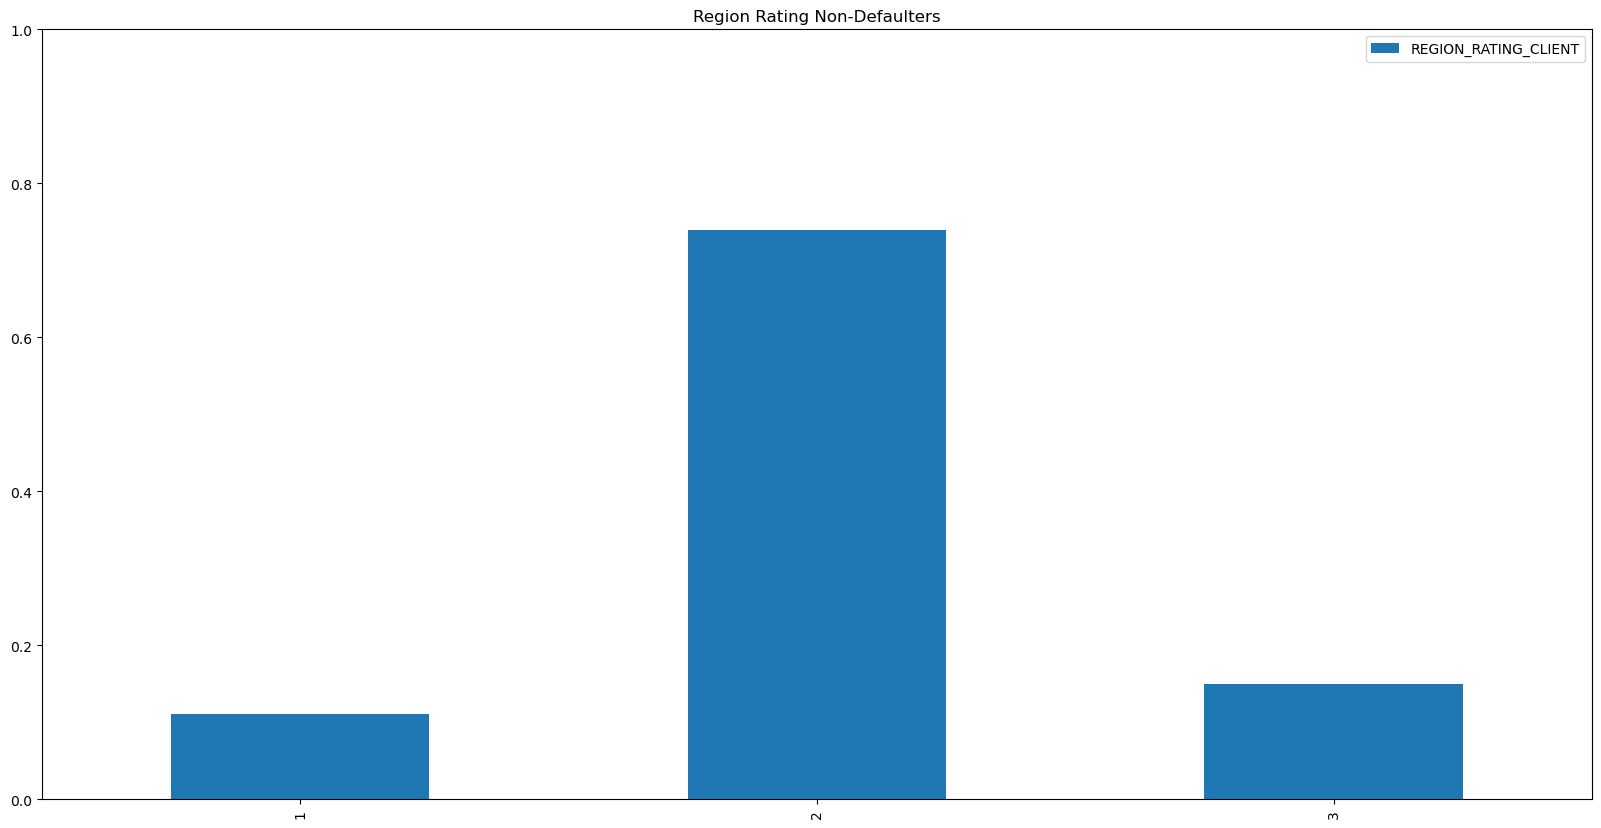

In [50]:
# Location REGION_RATING_CLIENT
location_defaulters = pd.DataFrame(df_defaulters["REGION_RATING_CLIENT"].value_counts(normalize=True).sort_index())
location_normal = pd.DataFrame(df_normal["REGION_RATING_CLIENT"].value_counts(normalize=True).sort_index())
fig2_1 = location_defaulters.plot.bar(figsize = (20,10),ylim=(0.0,1))
plt.title("Region Rating Defaulters")
plt.savefig('figures\\fig2_1.png')
fig2_2 = location_normal.plot.bar(figsize = (20,10),ylim=(0.0,1))
plt.title("Region Rating Non-Defaulters")
plt.savefig('figures\\fig2_2.png')
print(location_defaulters)
print(location_normal)
print(df_defaulters["REGION_RATING_CLIENT"].describe())
print(df_normal["REGION_RATING_CLIENT"].describe())

Normal customer has higher percentage than defaulters in region rated 1, similar percentage in region rated 2, and lower percentage in region rate 3.

# Family Status

### Defaulters

In [31]:
# View the data in the family status column
df_defaulters["NAME_FAMILY_STATUS"]

0        Single / not married
1                       Widow
2                     Married
3              Civil marriage
6                   Separated
                 ...         
24820                 Married
24821          Civil marriage
24822                 Married
24823          Civil marriage
24824                 Married
Name: NAME_FAMILY_STATUS, Length: 18530, dtype: object

In [32]:
# Group by family status (defaulters)
fam_stat_defaulters = df_defaulters.groupby("NAME_FAMILY_STATUS")

In [33]:
# Display the count of of each category (defaulters)
fam_stat_d = fam_stat_defaulters["NAME_FAMILY_STATUS"].count().sort_values()
fam_stat_d

NAME_FAMILY_STATUS
Widow                     334
Separated                1173
Civil marriage           2330
Single / not married     3451
Married                 11242
Name: NAME_FAMILY_STATUS, dtype: int64

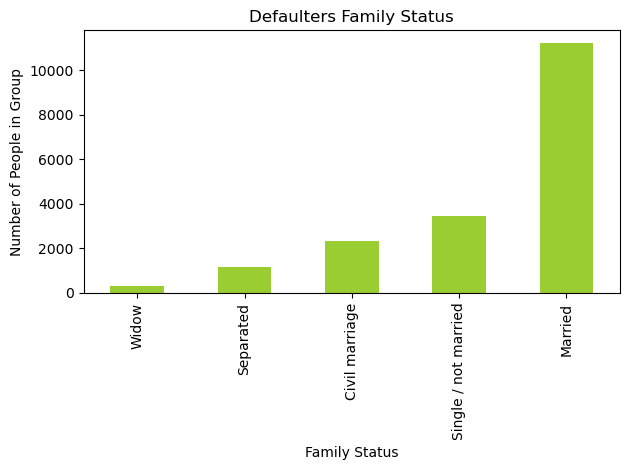

In [34]:
# Create bar graph of the family status for defualters
bar_fam_stat_d = fam_stat_d.plot(kind="bar", color="yellowgreen")
bar_fam_stat_d.set_title("Defaulters Family Status")
bar_fam_stat_d.set_xlabel("Family Status")
bar_fam_stat_d.set_ylabel("Number of People in Group")
# Save Figure for use later
plt.savefig("figures\FamilyStatus-Defaulters", bbox_inches="tight")
plt.tight_layout()
plt.show()

### Non-Defaulters

In [35]:
# View the data in the family status column (non-defaulters)
df_normal["NAME_FAMILY_STATUS"]

24825                  Married
24826     Single / not married
24827           Civil marriage
24828     Single / not married
24829                  Married
                  ...         
199993                 Married
199994    Single / not married
199995                 Married
199996                 Married
199997                 Married
Name: NAME_FAMILY_STATUS, Length: 119011, dtype: object

In [36]:
# Group by family status (non-defaulters)
fam_stat_normal = df_normal.groupby("NAME_FAMILY_STATUS")

In [37]:
# Display the count of of each category (non-defaulters)
fam_stat_n = fam_stat_normal["NAME_FAMILY_STATUS"].count().sort_values()
fam_stat_n

NAME_FAMILY_STATUS
Widow                    3149
Separated                7522
Civil marriage          12149
Single / not married    17784
Married                 78407
Name: NAME_FAMILY_STATUS, dtype: int64

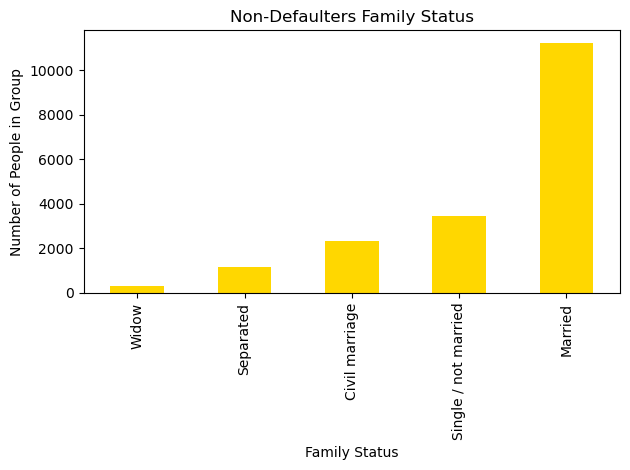

In [38]:
# Create bar graph of the family status for defualters
bar_fam_stat_n = fam_stat_d.plot(kind="bar", color="gold")
bar_fam_stat_n.set_title("Non-Defaulters Family Status")
bar_fam_stat_n.set_xlabel("Family Status")
bar_fam_stat_n.set_ylabel("Number of People in Group")
# Save Figure for use later
plt.savefig("figures\FamilyStatus-NonDefaulters", bbox_inches="tight")
plt.tight_layout()
plt.show()

# Gender

### Defaulters

In [39]:
# Group by gender (defaulters)
gender_group_defaulters = df_defaulters.groupby("CODE_GENDER")["CODE_GENDER"].count()
gender_group_defaulters

CODE_GENDER
F    9957
M    8573
Name: CODE_GENDER, dtype: int64

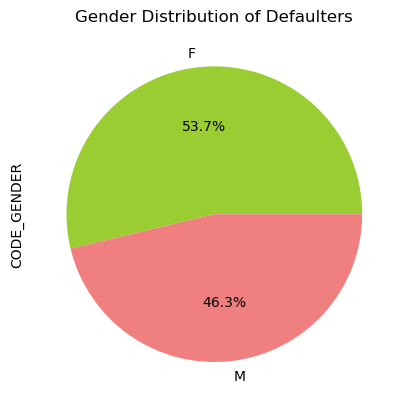

In [40]:
# Display a pie chart of the gender distribution for defaulters
colours = ['yellowgreen', 'lightcoral']
pie_gender_defaulters = gender_group_defaulters.plot(kind="pie", autopct='%1.1f%%', colors=colours)
plt.title("Gender Distribution of Defaulters")
# Save Figure for use later
plt.savefig("figures\GenderDist-Defaulters")
plt.show()

### Non-Defaulters

In [41]:
# Group by gender (non-defaulters)
gender_group_normal = df_normal.groupby("CODE_GENDER")["CODE_GENDER"].count()
gender_group_normal

CODE_GENDER
F      73566
M      45443
XNA        2
Name: CODE_GENDER, dtype: int64

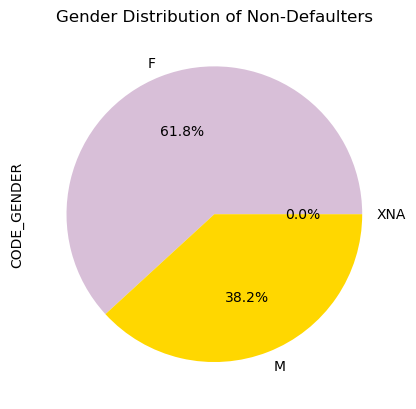

In [42]:
# Display a pie chart of the gender distribution for non-defaulters
colours = ['thistle', 'gold']
pie_gender_normal = gender_group_normal.plot(kind="pie", autopct='%1.1f%%', colors=colours)
plt.title("Gender Distribution of Non-Defaulters")
# Save Figure for use later
plt.savefig("figures\GenderDist-NonDefaulters")
plt.show()

# API Integration

In [43]:
# References:
# https://towardsdatascience.com/how-to-collect-data-from-statistics-canada-using-python-db8a81ce6475
# https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1110000401&pickMembers%5B0%5D=1.1&cubeTimeFrame.startYear=2021&cubeTimeFrame.endYear=2021&referencePeriods=20210101%2C20210101

In [44]:
# Pull data from StatCan using the stats_can library (Info on Tax Filers in Canada)
df = stats_can.table_to_df("11-10-0004-01")

11100004-eng.zip: 100%|██████████| 1.41M/1.41M [00:00<00:00, 6.30MB/s]


In [45]:
# Select only necessary data and filter by the year 2021
clean_stats=df.drop(columns=["SYMBOL", "TERMINATED", "DECIMALS", "SCALAR_ID", "VECTOR", "COORDINATE", "STATUS", "UOM_ID", "DGUID", "SCALAR_FACTOR"])
stats_2021_df = clean_stats.loc[(clean_stats["GEO"] == "Canada") & (clean_stats["REF_DATE"] =="2021-01-01")]

stats_2021_df

,REF_DATE,GEO,Summary table,UOM,VALUE
103899,2021-01-01,Canada,Number of tax filers,Number,29328850.0
103900,2021-01-01,Canada,Percentage of tax filers aged 0 to 24 years,Percent,11.0
103901,2021-01-01,Canada,Percentage of tax filers aged 25 to 44 years,Percent,34.0
103902,2021-01-01,Canada,Percentage of tax filers aged 45 to 64 years,Percent,32.0
103903,2021-01-01,Canada,Percentage of tax filers aged 65 years and over,Percent,24.0
103904,2021-01-01,Canada,Average age of tax filers,Years,49.0
103905,2021-01-01,Canada,"Percentage of tax filers, female",Percent,52.0
103906,2021-01-01,Canada,"Percentage of tax filers, married",Percent,46.0
103907,2021-01-01,Canada,Percentage of tax filers in apartments,Percent,11.0
103908,2021-01-01,Canada,Number of persons,Number,36993460.0


In [46]:
# Change the index
stats_2021_df.set_index("Summary table", inplace=True)

stats_2021_df

,REF_DATE,GEO,UOM,VALUE
Summary table,,,,
Number of tax filers,2021-01-01,Canada,Number,29328850.0
Percentage of tax filers aged 0 to 24 years,2021-01-01,Canada,Percent,11.0
Percentage of tax filers aged 25 to 44 years,2021-01-01,Canada,Percent,34.0
Percentage of tax filers aged 45 to 64 years,2021-01-01,Canada,Percent,32.0
Percentage of tax filers aged 65 years and over,2021-01-01,Canada,Percent,24.0
Average age of tax filers,2021-01-01,Canada,Years,49.0
"Percentage of tax filers, female",2021-01-01,Canada,Percent,52.0
"Percentage of tax filers, married",2021-01-01,Canada,Percent,46.0
Percentage of tax filers in apartments,2021-01-01,Canada,Percent,11.0


In [47]:
# Create variables to hold important information
num_tax_filers = stats_2021_df.loc["Number of tax filers", "VALUE"]
gender_percent_f = stats_2021_df.loc["Percentage of tax filers, female", "VALUE"]
gender_percent_m = 100 - gender_percent_f 
gender_f = (stats_2021_df.loc["Percentage of tax filers, female", "VALUE"] /100) * num_tax_filers
gender_m = (gender_percent_m / 100) * num_tax_filers

In [48]:
# Create DataFrame from important data variables and display the summary table 
important_data = {
    "Total Num Tax Filers": num_tax_filers,
    "Num Tax Filers Female": gender_f,
    "Num Tax Filers Male": gender_m    
}
summary_df = pd.DataFrame(important_data, index=[0])

summary_df

,Total Num Tax Filers,Num Tax Filers Female,Num Tax Filers Male
0,29328850.0,15251002.0,14077848.0


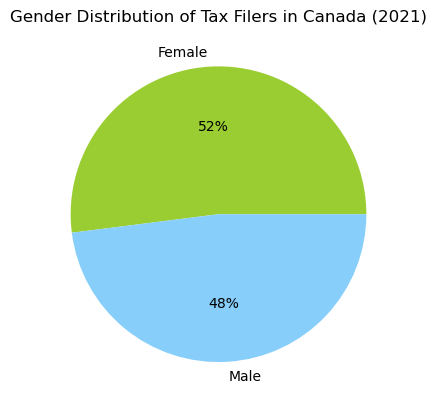

In [49]:
#Create pie chart of gender distribution (Tax Filers in Canada)
tax_filers_gender = [gender_percent_f, gender_percent_m]
plt.pie(tax_filers_gender, colors=["yellowgreen", "lightskyblue"], labels=["Female", "Male"], autopct='%1.0f%%')
plt.title("Gender Distribution of Tax Filers in Canada (2021)")
plt.savefig("figures\GenderDist-Canada2021")
plt.show()